In [1]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
from PrettyTable import PrettyTable
from functools import partial
warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    d = data
    w = weights
    return (d * w**-2).sum() / (w**-2).sum()

def error_with_weights(weights):
    w = weights
    return 1 / math.sqrt((w**-2).sum())

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

# Arbeitsgrundlagen

Im Versuch M1 geht es darum die Geschwindigkeit einer Pistolenkugel auf verschiedene Arten zu bestimmen. Dabei gibt es noch verschiedene Arten von Geschwindigkeiten.

## Flugzeitmethode

Die __mittlere Geschwindigkeit__ eines Objektes kann durch \ref{eq:velocity} berechnet werden.

\begin{equation}
\overline{v} = \frac{s}{t}
\label{eq:velocity}
\end{equation}

Wenn also die Abschusszeit und die Aufprallzeit, sowie die Flugstrecke bekannt sind, so kann die Zeitdifferenz und somit die mittlere Fluggeschwindigkeit des Geschosses ermittelt werden.

## Ballistische Methode

Der Impuls p ist gegeben durch die Gleichung in \ref{eq:impulse}.  Dieser Impuls kann beim Aufprall der Pistolenkugel auf ein ballistisches Pendel gemessen werden. Durch den erheblichen Massenunterschied der Kugel und des Pendels bleibt die Kugel stecken. Ein inelastischer Stoss resultiert. Aus diesem Grund wird die komplette kinetische Energie in Wärme umgewandelt. Der Energieerhaltungssatz ist hier also schwierig anwendbar.

\begin{equation}
p = mv = (m + M)\cdot u
\label{eq:impulse}
\end{equation}

Die verbleibende kinetische Energie wird beim Ausschlagen des Pendels in potentielle Hubenergie umgewandelt.
Mithilfe des Energiesatzes wird die Geschwindigkeit u durch die Hubhöhe h mit Gleichung \ref{eq:hubheight} ersetzt.

\begin{equation}
u = \sqrt{2gh}
\label{eq:hubheight}
\end{equation}

![Ballistische Methode](images/pendulum.png)

Aus Grafik \ref{fig:Ballistische Methode} können die Gleichungen \ref{eq:h} und \ref{eq:cosphi} bestimmt werden.

\begin{equation}
h = l \cdot (1 - cos\varphi)
\label{eq:h}
\end{equation}

\begin{equation}
\cos\varphi = \frac{a}{\sqrt{a^2 + x^2}}
\label{eq:cosphi}
\end{equation}

Da der Schwerpunkt und somit die Länge l des Pendels nur ungenau ermittelt werden können, wird ein Umweg über die Schwingungsdauer T ersichtlich in \ref{eq:Schwingungsdauer} gewählt.

\begin{equation}
T = 2\pi\cdot\sqrt{\frac{l}{g}}
\label{eq:Schwingungsdauer}
\end{equation}

Daraus resultiert die Gleichung \ref{eq:u}.

\begin{equation}
u = \frac{g}{2\pi}\cdot T\cdot\sqrt{2\cdot\Bigg(1-\frac{1}{\sqrt{1 + (\frac{x}{a})^2}}\Bigg)}
\label{eq:u}
\end{equation}

Mit je einer Taylorentwicklung kann die Gleichung \ref{eq:u} auf Gleichung \ref{eq:u_taylor} angenähert werden.

\begin{equation}
u = \frac{g}{2\pi}\cdot\frac{M+m}{m}\cdot T\cdot\frac{x}{a}\cdot\Bigg[1-\frac{3}{8}\cdot\Big(\frac{x}{a}\Big)^2\Bigg]
\label{eq:u_taylor}
\end{equation}

Da die Taylorreihe nur bis zum Grad 2 entwickelt wurde, wäre der nächste Term der Grässenordnung $10^{-4}$. Es ergibt sich also ein sehr genauer Wert.

Somit sind während des Experimentes die Grössen m, M, a, x und T zu bestimmen.

## Drehstossmethode

Bei dieser Methode wird ein Geschoss wie in Abbildung \ref{fig:Drehstossmethode} gezeigt ein Geschoss auf eine um eine starre Achse frei drehbar gelagerte Hantel abgeschossen.

![Drehstossmethode](images/drehstoss.png)

Für eine mit v geradlinig bewegte Punktmasse m kann der Drehimpuls bezüglich der Drehachse a mit Gleichung \ref{eq:drehimpuls} bestimmt werden.

\begin{equation}
\vec{L_a}=\vec{r}\times\vec{p}=m\cdot (\vec{r}\times\vec{v})
\label{eq:drehimpuls}
\end{equation}

Ferner ist bekannt, dass wie in Gleichung \ref{eq:gesamtdrehimpuls} beschrieben, der Gesamtdrehimpuls des Systems erhalten bleibt.

\begin{equation}
L_a=L_{a,Kugel}+L_{a,Hantel}=const.
\label{eq:gesamtdrehimpuls}
\end{equation}

Daraus folgt, dass für die anfänglich ruhende Hantel Gleichung \ref{eq:ruhe} gilt welche dann gleichzusetzen ist mit der Gleichung \ref{eq:bewegung} der bewegten Hantel nach dem Aufprall.

\begin{equation}
L_a=m\cdot d\cdot v+0
\label{eq:ruhe}
\end{equation}

\begin{equation}
L_a=\omega\cdot(I_{a, H}+m\cdot d^2)
\label{eq:bewegung}
\end{equation}

Daraus abgeleitet ergibt sich für die Geschwindigkeit der Pistolenkugel beim Aufprall die Gleichung \ref{eq:vdrehstoss}, wobei $I_{a, H}$ dem Inneren Moment der Hantel bezüglich a und $\omega$ der Winkelgeschwingikeit der Hantel um die Achse a entspricht.

\begin{equation}
v=\omega\cdot\bigg(\frac{I_{a, H}}{m\cdot d}+d\bigg)
\label{eq:vdrehstoss}
\end{equation}

Somit sind für dieses Experiment die Grössen $I_{a, H}$, m, d und $\omega$ zu bestimmen.

## Einfluss des Luftwiderstandes auf die Geschossgeschwindigkeit

Bisher wurde gezeigt wie die mittlere, sowie die Aufprallgeschwindigkeit ermittelt werden können. Interessant ist aber auch die Mündungsgeschwindigkeit des Geschosses.

Diese kann man sehr gut über den wirkenden Luftwiderstand bestimmen. Der Luftwiderstand ist gegeben durch die Beziehung in \ref{eq:luftwiderstand}, wobei v die Momentangeschwidigkeit des Geschosses, A die Querschnittfläche jenes Geschosses, $\rho_L$ die Luftdichte und c_w der Widerstandsbeiwert des Projektils sind.

\begin{equation}
F_L=\frac{1}{2}c_\omega\cdot A\cdot\rho_L\cdot v^2
\label{eq:luftwiderstand}
\end{equation}

Das Projektil verliert ebensoviel Kinetische Energie wie der Luftwiderstand Bremsarbeit verrichtet. Dies is mit Gleichungen \ref{eq:kinetische_energie} und \ref{eq:kinetische_energie_eingesetzt} ersichtlich.

\begin{equation}
dE_{kin}=-F_Lds
\label{eq:kinetische_energie}
\end{equation}

\begin{equation}
m\cdot v\cdot dv=-\frac{1}{2}c_\omega\cdot A\cdot\rho_L\cdot v^2\cdot ds
\label{eq:kinetische_energie_eingesetzt}
\end{equation}

Daraus kann die Differenzengleichung \ref{eq:kin_diff} gebildet werden. Mit den Anfangsbedingungen s = 0 und v = $v_0$ wird Gleichung \ref{eq:v0} erhalten. Diese kann für sehr kleine $k\cdot s$ mit \ref{eq:v0_approx} angenähert werden.

\begin{equation}
\frac{dv}{v}=-k\cdot ds
\label{eq:kin_diff}
\end{equation}

\begin{equation}
v=v_0\cdot e^{-k\cdot s}
\label{eq:v0}
\end{equation}

\begin{equation}
v=v_0\cdot (1-k\cdot s)
\label{eq:v0_approx}
\end{equation}

k ist in allen diesen Gleichungen mit dem Term $k = \frac{c_\omega\cdot A\cdot\rho_L}{2m}$ zu beziffern.

# Versuchsaufbau

# Versuchsdurchführung

In [2]:
# define base values and measurements

v1_s = 0.500
v1_sb1 = 1.800
v1_sb2 = 1.640
v1_m = np.mean([0.47, 0.46, 0.46, 0.46, 0.46, 0.47, 0.46, 0.46, 0.46, 0.46, 4.65 / 10]) * 1e-3
v1_T = np.mean([28.68 / 10, 28.91 / 10])

cw = 0.75
cw_u = 0.08
A = 4*10e-6
pl = 1.2041

def air_resistance(s, v):
    k = cw * A * pl / 2 / v1_m
    v0 = v / (1 - k * s)
    return v0

## Ballistische Methode

### Mittlere Geschwindigkeiten

Erst wurden 10 Messungen mit der ballistischen Methode durchgeführt. Hierbei wird ein Schuss auf ein Pendel abgefeuert.
Es werden dabei zwei Sachen gemessen. Zum einen wird die Zeit die vergeht bis das Projektil beide Lichtschranken passiert hat gemessen und zum anderen wird der Ausschlag des Pendels gemessen.
Da in der Pendelgleichung der Luftwiderstand sowie der Reibungswiderstand der Aufhängung nicht berücksichtigt sind, wurden 5 Messungen des Ausschlages gemacht. Mit linearer Regression kann somit der korrekte erste Ausschlag gefunden werden. So ist nämlich der Y-Achsenabschnitt der Fit-Gerade gerade der um den Luftwiderstand korrigierte erste Ausschlag.

Dieses Verfahren ist in Grafik \ref{fig:luftwiderstand_fit} gut zu sehen. Dieses wurde für alle zehn abgegeben Schuss durchgeführt, hier aber nur für den ersten Schuss grafisch dargestellt.

({'text/html': '<p>This is a figure</p><matplotlib.figure.Figure object at 0x10fb55978>', 'image/png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x0f\x00\x00\x01n\x08\x06\x00\x00\x00\x06e\xfb\xc0\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x88\x00\x00\x0b\x88\x01\xe5\x8e)I\x00\x00 \x00IDATx\x9c\xed\xddy|T\xf5\xbd\xff\xf1\xd7\xc9F \x99$@CX\x92\x01E \x0b\x8b\x08$&h\xdd\x90E\xaaRS\xe3\x8a\nIQl\xfdakk\xab\x17\x82\x81To\x85\xb6Z\xbdz\xdb&\xb8/DE\xa5\xa2\x8c\xe2Rm\x18\x12@D`\x08A\x8ad\x12\x10S \x99I l\x99\xdf\x1f\\R\xc3~"\x933I\xde\xcf\xc7\xa3\x8fG&3g\xce\x87O\xc7\xc3\x9b\xcf9s\xbe\x86\xcf\xe7\xf3!"""r\x86\x82\xac.@DDD\xda\x16\x85\x07\x11\x11\x111E\xe1ADDDLQx\x10\x11\x11\x11S\x14\x1eDDD\xc4\x14\x85\x07\x11\x11\x111%\xc4\xea\x02\xce\x96C\x87\x1a\xd9\xb3\xa7\xde\xea2\xda\x94\xae]#\xd4\xb3\x16P\xdf\xccS\xcfZF}3O=k\x99\xd8X\x9b\xa9\xd7\xb7\x9b\xc9CHH\xbb\xf9\xa3\xb4\x1a\xf5\xace\xd47\xf3\xd4\xb3\x96Q\xdf\xccS\xcfZ\x87\xba,"""\xa6(<\x88\x88\x88\x88)\n\x0f"""

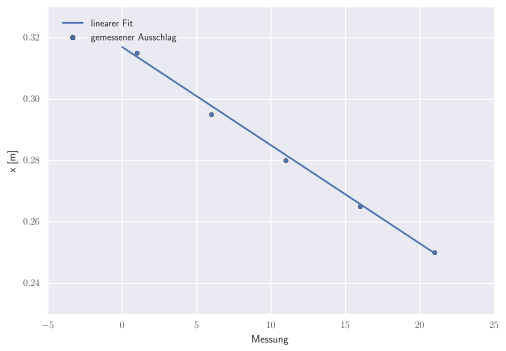

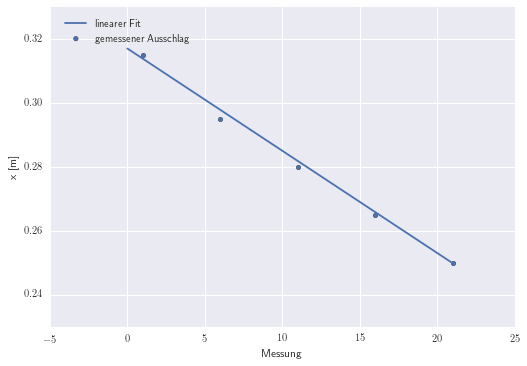

In [46]:
# Evaluate Data

# Read Data
v1_df = pd.read_csv('data/ballistisch.csv')
v1_M = 0.09836
v1_a = 1.973
v1_g = 9.80705

# Plot only one graph of the linear fit
df = pd.read_csv('data/ballistsisch_0.csv')
slope, intercept, r, p, sem = stats.linregress(df['measurement'] + 0.25, df['x'])
n = np.linspace(0, 21, 100)

ax = df.plot(kind='scatter', x='measurement', y='x', label='gemessener Ausschlag')
plt.plot(n, [i * slope + intercept for i in n], label='linearer Fit', axes=ax)
plt.xlabel('Messung')
plt.ylabel('x [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)

from IPython.display import (
    display, display_html, display_png, display_svg
)
from IPython.core.pylabtools import print_figure
from IPython.display import Image, SVG, Math

ip = get_ipython()
print(ip.display_formatter.format(figure))

display(ax.figure)
class Figure:
    def __init__(self, figure, label=None, caption='Description missing'):
        self.figure = figure
        self.caption = caption
        self.label = label
        self._png_data = None

    def _figure_data(self, format):
        data = print_figure(self.figure, format)
        # We MUST close the figure, otherwise IPython's display machinery
        # will pick it up and send it as output, resulting in a double display
        plt.close(self.figure)
        return data

    def _repr_png_(self):
        if self._png_data is None:
            self._png_data = self._figure_data('png')
        return self._png_data

    def _repr_html_(self):
        return '<p>This is a figure</p>' + self.figure.__repr__()

    def _repr_latex_(self):
        return '$\mathcal{N}(\mu=%.2g, \sigma=%.2g),\ N=%d$'

figure = Figure(ax.figure, label='fig:1', caption='XY')
display(figure)

Es resultiert in Grafik \ref{fig:luftwiderstand_fit} also ein maximaler Ausschlag von {{intercept}}m. In diesem sind bereits jegliche Verluste berücksichtigt.

Dies wird nun für alle zehn Messungen durchgeführt. Nun kann aus Gleichung \ref{eq:u_taylor} die Aufprallgeschwindigkeit errechnet werden. In Grafik \ref{fig:v_ballistisch} Sind die errechneten Geschwindigkeiten beim Aufprall dargestellt.

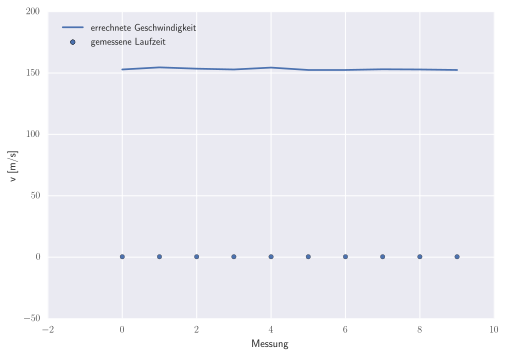

In [140]:
# Calculate mean velocity
v1_df['v_flug'] = pd.Series(v1_s / v1_df['t'])

# Calculate all x from the measurements
v1_x = []
for n in range(10):
    df = pd.read_csv('data/ballistsisch_{}.csv'.format(n))
    slope, intercept, r, p, sem = stats.linregress(df['measurement'] + 0.25, df['x'])
    v1_x.append(intercept)
v1_df['x'] = pd.Series(v1_x)

# Calculate all v at impact
v1_k = v1_g / (2 * math.pi) * (v1_M + v1_m) / v1_m / v1_a * v1_T
v1_b = 1 - 3 / 8 * (v1_df['x'] / v1_a)**2
v1_df['v_ballistic'] = pd.Series(v1_k * v1_df['x'] * v1_b)

# Plot calculated velocities
ax = v1_df.plot(kind='scatter', x='measurement', y='x', label='gemessene Laufzeit')
plt.plot(v1_df['measurement'], v1_df['v_ballistic'], label='errechnete Geschwindigkeit', axes=ax)
plt.xlabel('Messung')
plt.ylabel('v [m/s]')
# plt.xlim([0, len(v1_df['t']) + 1])
# plt.ylim([0.0065, 0.0085])
# plt.axhline(y=v1_mean, axes=ax, color='red', label='Mittelwert')
# plt.axhline(y=v1_mean+v1_sem, axes=ax, color='green', label='Mittelwert ± Fehler')
# plt.axhline(y=v1_mean-v1_sem, axes=ax, color='green')
# plt.axhline(y=v1_mean+v1_std, axes=ax, color='purple', label='Mittelwert ± Standardabweichung')
# plt.axhline(y=v1_mean-v1_std, axes=ax, color='purple')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

Zusätzlich zur mittleren Aufprallgeschwindigkeit errechnen wir ebenfall die mittlere Geschwindikeit mithilfe der Flugmethode.
Dann werden beide Werte mithilfe der Luftwiderstandskorrekturgleichung \ref{eq:v0_approx} auf die mittlere Mündungsgeschwindigkeit umgerechnet.
In Grafik \ref{fig:laufzeiten} sind nun die einzelnen mittleren Laufzeiten und ihre Unsicherheiten dargestellt.

In [2]:
# Plot different methods with sem

v1_mean = v1_df.mean()
v1_sem = v1_df.sem()
v1_flug_muendung_mean = air_resistance(v1_s + 0.2, v1_mean['v_flug'])
v1_ballistic_muendung_mean = air_resistance(v1_sb1, v1_mean['v_ballistic'])
v1_ballistic_mean = air_resistance(v1_sb1 / 2, v1_mean['v_ballistic'])

x = [1, 4, 7, 10]
y = [
    v1_mean['v_flug'],
    v1_ballistic_mean,
    v1_flug_muendung_mean,
    v1_ballistic_muendung_mean
]
e = [
    v1_sem['v_flug'],
    v1_sem['v_ballistic'],
    v1_flug_muendung_sem,
    v1_ballistic_muendung_sem
]
labels = ['Flugzeitmethode', 'Ballistische Methode', 'Mündungsgeschwindigkeit Flugzeitmethode', 'Mündungsgeschwindigkeit Ballistische Methode']
plt.errorbar(x, y, yerr=e, fmt='o')
plt.xlim([0, 11])
plt.xticks(x, labels, rotation='35')
plt.show()

NameError: name 'v1_df' is not defined

### Vergleich der Messmethoden

Um die Messmethoden vergleichen zu können werden alle _einzelnen_ errechneten Geschwindigkeiten mithilfe der Luftwiderstandskorrekturgleichung auf einen Bezugspunkt, in diesem Falle wurde die Mündung gewählt, umgerechnet.



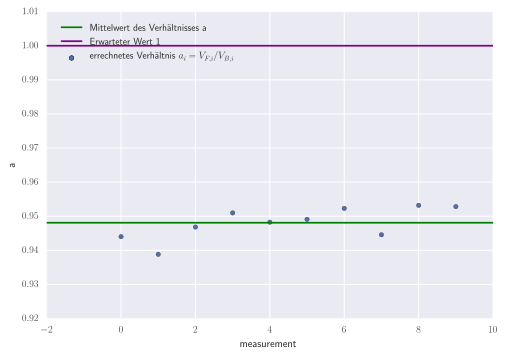

In [156]:
v1_mean = v1_df.mean()
v1_sem = v1_df.sem()
v1_flug_muendung = pd.Series(list(map(partial(air_resistance, v1_s + 0.2), v1_df['v_flug'])))
v1_ballistic_muendung = pd.Series(list(map(partial(air_resistance, v1_sb1), v1_df['v_ballistic'])))
v1_a = v1_flug_muendung / v1_ballistic_muendung
v1_a_mean = np.mean(v1_a)
v1_a_sem = stats.sem(v1_a)
v1_df['a'] = v1_a
v1_df['v_flug_muendung'] = v1_flug_muendung

ax = v1_df.plot(kind='scatter', x='measurement', y='a', label='errechnetes Verhältnis $a_i = V_{F,i}/V_{B,i}$')
plt.axhline(y=v1_a_mean, axes=ax, label='Mittelwert des Verhältnisses a', color='green')
plt.axhline(y=1, axes=ax, label='Erwarteter Wert 1', color='purple')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.show()

### Streuung der Mündungsgeschwindigkeit



In [1]:
# Plot different methods with sem

v1_mean = v1_df.mean()['v_flug_muendung']
v1_sem = v1_df.sem()['v_flug_muendung']
v1_std = v1_df.std()['v_flug_muendung']
ax = v1_df.plot(kind='scatter', x='measurement', y='v_flug_muendung', label='errechnete Geschwindigkeit an der Mündung')
plt.axhline(y=v1_mean, axes=ax, color='red', label='Mittelwert')
plt.axhline(y=v1_mean+v1_sem, axes=ax, color='green', label='Mittelwert ± Fehler')
plt.axhline(y=v1_mean-v1_sem, axes=ax, color='green')
plt.axhline(y=v1_mean+v1_std, axes=ax, color='purple', label='Mittelwert ± Standardabweichung')
plt.axhline(y=v1_mean-v1_std, axes=ax, color='purple')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)
plt.xlabel('Messung')
plt.ylabel('$v_0 [\\frac{m}{s}]$')
plt.show()

NameError: name 'v1_df' is not defined

In Grafik \ref{fig:muendungsgeschwindigkeiten} sind die mithilfe der Flugzeitmethode und der Luftwiderstandskorrektur errechneten Mündungsgeschwindigkeiten gezeigt. 80% der Ergebnissle liegen innerhalb der Standardabweichung. Dies ist ein Bisschen mehr als die erwarteten 68%.

## Drehstossmethode

In [3]:
# Evaluate Data

# Read Data
v1_df = pd.read_csv('data/drehstoss.csv')
v1_inertia = 0
v1_d1 = 92
v1_d2 = 91
v1_m1 = np.mean([15.86, 15.88])
v1_m2 = np.mean([42.03, 42.13])

KeyError: 't'